In [270]:
from tqdm import tqdm 
import numpy as np
from datetime import timedelta
import os
import pandas as pd 
file_path = '/data1/ercot_data/load_data'
files = os.listdir(file_path)

In [273]:
from openpyxl import load_workbook

fp = os.path.join(file_path,files[-4])
wb = load_workbook(fp, read_only=True, data_only=True)
ws = wb.active  # or wb["Sheet1"]
real_rows = 0
for row in ws.iter_rows(values_only=True):
    if any(cell is not None for cell in row):
        real_rows += 1

print("Actual rows:", real_rows)
print("Max row:", ws.max_row)

Actual rows: 7689
Max row: 1048576


In [276]:
files[-4]

'ERCOT Backcasted Load Profiles 2025.xlsx'

In [277]:
len(data[2025])

7688

In [ ]:

files = [i for i in files if '.html' not in i]
dfs = []
for i in tqdm(files):
    try:
        dfs.append(pd.read_excel(os.path.join(file_path,i)))
    except:
        print(i)

  0%|          | 0/32 [00:00<?, ?it/s]/home/dell/miniconda3/envs/stock/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
 19%|█▉        | 6/32 [00:40<02:32,  5.86s/it]/home/dell/miniconda3/envs/stock/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
100%|██████████| 32/32 [03:59<00:00,  7.47s/it]


In [272]:
len(dfs[-4])

7688

In [140]:
import re
years = []
data = {}
files_list = []
for i,filename in enumerate(files):
    if 'Auxiliary' in filename:
        continue
    match = re.findall(r"20\d{2}", filename)
    if len(match)==0:
        match = re.findall(r"\d{2}-\d{2}-\d{2}", filename)
    if len(match)==0:
        match = re.findall(r"\d{2}\d{2}\d{2}", filename)
    if len(match)==0:
        continue
    match = match[0]
    if len(match)>4:
        match = match[-2:]
        if int(match)>50:
            match = '19'+match
        else:
            match = '20'+match
    years.append(int(match))
    data[int(match)]=dfs[i]
    files_list.append(filename)
data = dict(sorted(data.items()))
ids = np.argsort(years)
years=sorted(years)
data[2007].columns = data[2007].iloc[0]
data[2007] = data[2007].iloc[1:]   
data[1997].columns = data[1997].iloc[1]
data[1997] = data[1997].iloc[1:]                 # drop first row
data[1997] = data[1997].iloc[1:]                 # drop first row              # drop first row


In [264]:
keys = ['Profile Type & Weather Zone', 'PType_WZ' ,'Profile Type and Weather Zone' ]
zones = {}
for k,v in data.items():
    for ki in keys:
        if ki in v:
            zones[k] = v[ki].unique()
            if ki != 'PType_WZ':
                data[k].rename(columns={ki:'PType_WZ'},inplace=True)
            continue
nzones = {k:len(v) for k,v in zones.items()}

complete_zone_list = zones[2026]


In [265]:
['ERC_TRADE_DATE' in i or 'Date' in i for i in data.values()]
#in i or 'PType_WZ' in i or 'Profile Type and Weather Zone' 
date_keys = ['ERC_TRADE_DATE', 'Date' ]

for k,i in data.items():
    for di in date_keys:
        if di in i:
            if di != 'Date':
                data[k].rename(columns={di:'Date'},inplace=True)
            data[k].set_index('Date',inplace=True)

In [279]:
for i in data.values():
    idx = i.index
    print("min", idx.min(), "max", idx.max(), "n_days", idx.nunique())
    print("expected days in range", (idx.max() - idx.min()).days + 1)


min 1997-01-03 00:00:00 max 1997-12-31 00:00:00 n_days 363
expected days in range 363
min 1998-01-01 00:00:00 max 1998-12-31 00:00:00 n_days 365
expected days in range 365
min 1999-01-01 00:00:00 max 1999-12-31 00:00:00 n_days 365
expected days in range 365
min 2000-01-01 00:00:00 max 2000-12-31 00:00:00 n_days 366
expected days in range 366
min 2001-01-01 00:00:00 max 2001-12-31 00:00:00 n_days 365
expected days in range 365
min 2002-01-01 00:00:00 max 2002-12-31 00:00:00 n_days 365
expected days in range 365
min 2003-01-01 00:00:00 max 2003-12-31 00:00:00 n_days 365
expected days in range 365
min 2004-01-01 00:00:00 max 2004-12-31 00:00:00 n_days 366
expected days in range 366
min 2005-01-01 00:00:00 max 2005-12-31 00:00:00 n_days 365
expected days in range 365
min 2006-01-01 00:00:00 max 2006-12-31 00:00:00 n_days 365
expected days in range 365
min 2007-01-01 00:00:00 max 2007-12-31 00:00:00 n_days 365
expected days in range 365
min 2008-01-01 00:00:00 max 2008-12-31 00:00:00 n_days

In [275]:
[(k,i.index.max()) for k,i in data.items()]

[(1997, Timestamp('1997-12-31 00:00:00')),
 (1998, Timestamp('1998-12-31 00:00:00')),
 (1999, Timestamp('1999-12-31 00:00:00')),
 (2000, Timestamp('2000-12-31 00:00:00')),
 (2001, Timestamp('2001-12-31 00:00:00')),
 (2002, Timestamp('2002-12-31 00:00:00')),
 (2003, Timestamp('2003-12-31 00:00:00')),
 (2004, Timestamp('2004-12-31 00:00:00')),
 (2005, Timestamp('2005-12-31 00:00:00')),
 (2006, Timestamp('2006-12-31 00:00:00')),
 (2007, Timestamp('2007-12-31 00:00:00')),
 (2008, Timestamp('2008-12-31 00:00:00')),
 (2009, Timestamp('2009-09-30 00:00:00')),
 (2010, Timestamp('2010-09-30 00:00:00')),
 (2011, Timestamp('2011-09-30 00:00:00')),
 (2012, Timestamp('2012-06-30 00:00:00')),
 (2013, Timestamp('2013-03-31 00:00:00')),
 (2014, Timestamp('2014-03-31 00:00:00')),
 (2015, Timestamp('2015-03-31 00:00:00')),
 (2016, Timestamp('2016-03-31 00:00:00')),
 (2017, Timestamp('2017-03-31 00:00:00')),
 (2018, Timestamp('2018-01-31 00:00:00')),
 (2019, Timestamp('2019-01-31 00:00:00')),
 (2020, Tim

In [ ]:
all_cols = {}
col_nums = {}
col_name_change_dict = {i:'INT'+i[7:].zfill(3) for i in data[2026].columns if i not in ['PType_WZ','ADDTIME']}
for k,v in data.items():
    cols = v.columns
    all_cols[k] = [i for i in cols if i!= 'PType_WZ']
    col_nums[k] = len(all_cols[k] )
    if 'int_kWh1' in v.columns:
        data[k].rename(columns=col_name_change_dict,inplace=True)



In [ ]:
int_cols = ['INT'+str(i+1).zfill(3) for i in range(100)]
dfi = data[2026]

In [244]:
df_all

array([['BUSHILF_COAST', 11.76, 11.67, ..., nan, nan, nan],
       ['BUSHILF_EAST', 8.23, 8.14, ..., nan, nan, nan],
       ['BUSHILF_FWEST', 8.03, 7.99, ..., nan, nan, nan],
       ...,
       ['RESLOWR_WEST', 0.172, 0.168, ..., nan, nan, nan],
       ['RESLOWR_WEST', 0.19, 0.184, ..., nan, nan, nan],
       ['RESLOWR_WEST', 0.217, 0.21, ..., nan, nan, nan]],
      shape=(280272, 101), dtype=object)

In [ ]:
df_all = pd.concat([data[2011+i].loc[:,["PType_WZ"]+int_cols] for i in range(16)])
  

s = (df_all[["PType_WZ", *int_cols]]
     .set_index("PType_WZ", append=True)[int_cols]
     .stack(dropna=True)  # drops NaNs efficiently (incl trailing INT097-INT100)
     .rename("kwh"))

# build timestamps vectorized
dates = s.index.get_level_values(0)
zones = s.index.get_level_values(1)
interval = s.index.get_level_values(2)  # e.g. "INT001"

# your original convention: INT001 -> Date + 15min (interval ending)
timestamps = dates + pd.to_timedelta(interval.str[3:].astype(int) * 15, unit="m")

# wide: rows=time, cols=zone
df_across_zones = (pd.DataFrame({"timestamp": timestamps,
                                "zone": zones,
                                "kwh": s.to_numpy()})
                   .pivot_table(index="timestamp", columns="zone", values="kwh", aggfunc="sum")
                   .reindex(columns=complete_zone_list)
                   .sort_index())



/tmp/ipykernel_557332/400497894.py:6: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(dropna=True)  # drops NaNs efficiently (incl trailing INT097-INT100)


zone,BUSHIDG_COAST,BUSHIDG_EAST,BUSHIDG_FWEST,BUSHIDG_NCENT,BUSHIDG_NORTH,BUSHIDG_SCENT,BUSHIDG_SOUTH,BUSHIDG_WEST,BUSHILF_COAST,BUSHILF_EAST,...,RESLOWD_SOUTH,RESLOWD_WEST,RESLOWR_COAST,RESLOWR_EAST,RESLOWR_FWEST,RESLOWR_NCENT,RESLOWR_NORTH,RESLOWR_SCENT,RESLOWR_SOUTH,RESLOWR_WEST
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.760,8.230,...,0.179,0.206,0.203,0.206,0.206,0.290,0.201,0.193,0.179,0.206
2011-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.670,8.140,...,0.173,0.199,0.197,0.199,0.200,0.282,0.196,0.187,0.173,0.199
2011-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.610,8.060,...,0.166,0.192,0.191,0.192,0.193,0.274,0.190,0.181,0.166,0.192
2011-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.550,7.970,...,0.160,0.185,0.186,0.187,0.187,0.268,0.186,0.176,0.160,0.185
2011-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.510,7.860,...,0.154,0.175,0.183,0.179,0.180,0.263,0.184,0.170,0.154,0.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-31 23:00:00,12.271,8.248,7.989,14.402,11.080,12.547,8.542,8.352,12.271,8.248,...,0.234,0.269,0.335,0.297,0.282,0.408,0.299,0.270,0.234,0.269
2026-01-31 23:15:00,12.095,8.186,7.953,14.340,10.946,12.355,8.506,8.339,12.095,8.186,...,0.238,0.264,0.333,0.281,0.272,0.400,0.280,0.268,0.238,0.264
2026-01-31 23:30:00,12.023,8.156,7.954,14.319,10.886,12.258,8.495,8.331,12.023,8.156,...,0.235,0.257,0.327,0.270,0.261,0.389,0.266,0.260,0.235,0.257


<Axes: xlabel='timestamp'>

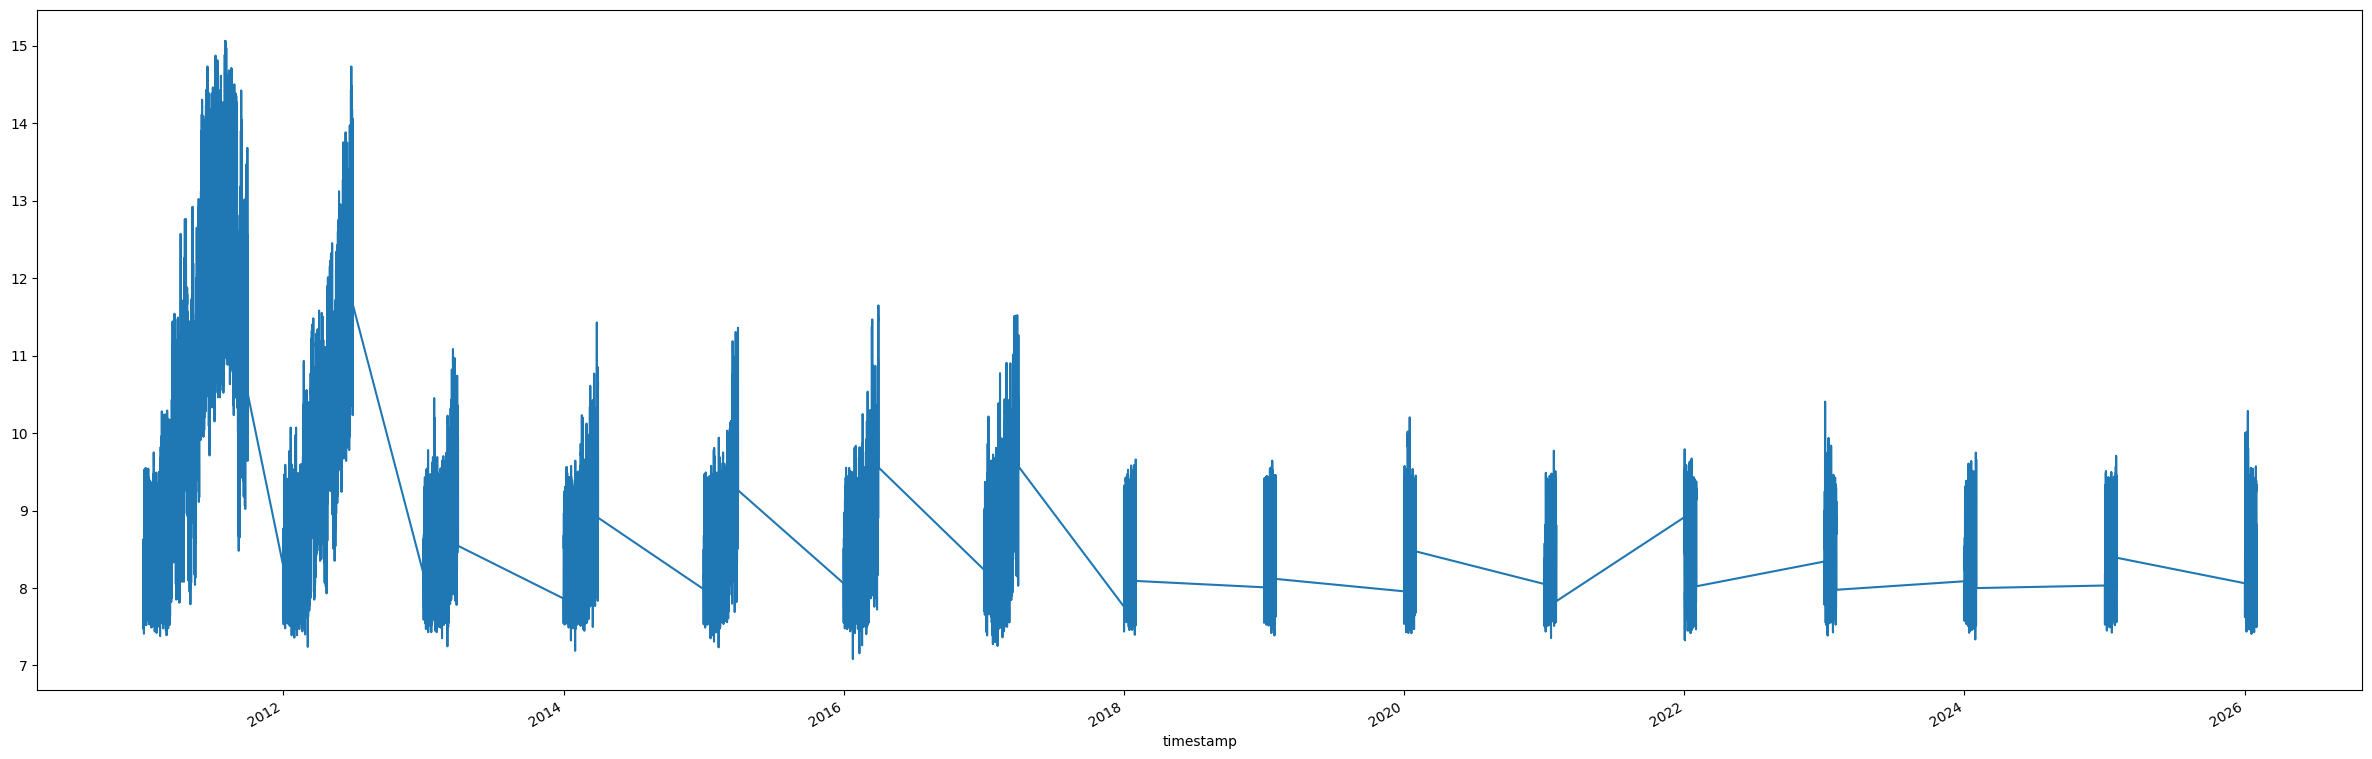

In [248]:
df_across_zones['BUSHILF_EAST'].plot(figsize=[30,10])

In [250]:
df_across_zones[:200]

zone,BUSHIDG_COAST,BUSHIDG_EAST,BUSHIDG_FWEST,BUSHIDG_NCENT,BUSHIDG_NORTH,BUSHIDG_SCENT,BUSHIDG_SOUTH,BUSHIDG_WEST,BUSHILF_COAST,BUSHILF_EAST,...,RESLOWD_SOUTH,RESLOWD_WEST,RESLOWR_COAST,RESLOWR_EAST,RESLOWR_FWEST,RESLOWR_NCENT,RESLOWR_NORTH,RESLOWR_SCENT,RESLOWR_SOUTH,RESLOWR_WEST
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.76,8.23,...,0.179,0.206,0.203,0.206,0.206,0.290,0.201,0.193,0.179,0.206
2011-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.67,8.14,...,0.173,0.199,0.197,0.199,0.200,0.282,0.196,0.187,0.173,0.199
2011-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.61,8.06,...,0.166,0.192,0.191,0.192,0.193,0.274,0.190,0.181,0.166,0.192
2011-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.55,7.97,...,0.160,0.185,0.186,0.187,0.187,0.268,0.186,0.176,0.160,0.185
2011-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.51,7.86,...,0.154,0.175,0.183,0.179,0.180,0.263,0.184,0.170,0.154,0.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-03 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.09,7.56,...,0.134,0.160,0.181,0.197,0.192,0.244,0.181,0.181,0.134,0.160
2011-01-03 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.07,7.46,...,0.135,0.161,0.175,0.199,0.190,0.241,0.176,0.181,0.135,0.161
2011-01-03 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.06,7.43,...,0.133,0.159,0.172,0.198,0.187,0.238,0.173,0.180,0.133,0.159


In [251]:
data[2025]

,PType_WZ,INT001,INT002,INT003,INT004,INT005,INT006,INT007,INT008,INT009,...,INT092,INT093,INT094,INT095,INT096,INT097,INT098,INT099,INT100,ADDTIME
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-01,BUSHIDG_COAST,11.439,11.359,11.304,11.255,11.231,11.217,11.174,11.159,11.160,...,11.927,11.715,11.612,11.512,11.366,NaN,NaN,NaN,NaN,2025-01-05
2025-01-02,BUSHIDG_COAST,11.537,11.467,11.426,11.399,11.410,11.415,11.384,11.387,11.398,...,12.207,11.962,11.835,11.719,11.556,NaN,NaN,NaN,NaN,2025-01-06
2025-01-03,BUSHIDG_COAST,11.512,11.443,11.404,11.379,11.389,11.397,11.370,11.380,11.397,...,12.652,12.418,12.301,12.190,12.031,NaN,NaN,NaN,NaN,2025-01-07
2025-01-04,BUSHIDG_COAST,12.072,11.990,11.935,11.888,11.865,11.855,11.816,11.811,11.826,...,12.816,12.602,12.504,12.405,12.256,NaN,NaN,NaN,NaN,2025-01-08
2025-01-05,BUSHIDG_COAST,12.534,12.460,12.418,12.393,12.422,12.429,12.389,12.377,12.362,...,11.521,11.327,11.231,11.137,10.997,NaN,NaN,NaN,NaN,2025-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27,RESLOWR_WEST,0.166,0.162,0.158,0.155,0.154,0.153,0.152,0.150,0.152,...,0.247,0.230,0.216,0.207,0.199,NaN,NaN,NaN,NaN,2025-01-31
2025-01-28,RESLOWR_WEST,0.141,0.138,0.135,0.134,0.135,0.135,0.135,0.134,0.136,...,0.219,0.200,0.187,0.178,0.171,NaN,NaN,NaN,NaN,2025-02-01
2025-01-29,RESLOWR_WEST,0.144,0.141,0.137,0.135,0.134,0.133,0.132,0.131,0.131,...,0.217,0.197,0.184,0.174,0.167,NaN,NaN,NaN,NaN,2025-02-02


In [254]:
data[2024].index.max()

Timestamp('2024-01-31 00:00:00')

In [ ]:

df_across_zones = {}
for zi in complete_zone_list:
    all_dfs = []
    dfz = dfi[dfi['PType_WZ']==zi]
    for i,ri in dfz.iterrows():
        int_to_time = {inti:i+timedelta(minutes=15*int(inti[3:])) for inti in int_cols}
        ri = ri.loc[int_cols]
        ri = ri.loc[:ri.last_valid_index()]
        ri = ri.rename(index=int_to_time)
        all_dfs.append(ri)
    all_dfs = pd.concat(all_dfs)
    df_across_zones[zi] = all_dfs
    df_across_zones = pd.DataFrame(df_across_zones)

In [227]:
nzones

{1997: 72,
 1998: 72,
 1999: 72,
 2000: 72,
 2001: 72,
 2002: 72,
 2003: 72,
 2004: 72,
 2005: 72,
 2006: 72,
 2007: 80,
 2008: 80,
 2009: 192,
 2010: 192,
 2011: 248,
 2012: 248,
 2013: 248,
 2014: 248,
 2015: 248,
 2016: 248,
 2017: 248,
 2018: 248,
 2019: 248,
 2020: 248,
 2021: 248,
 2022: 248,
 2023: 248,
 2024: 248,
 2025: 248,
 2026: 248}

2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
